In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Linear Regression

Project plan:
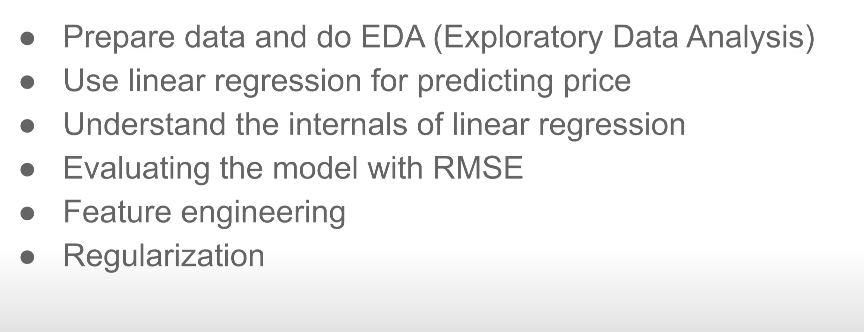

For this topic, we'll use [BigQuery ML](https://cloud.google.com/bigquery/docs/bqml-introduction) and [bigframes](https://cloud.google.com/python/docs/reference/bigframes/latest) to test out the capabilities of BQ for modeling and pre-processing.

- https://cloud.google.com/bigquery/docs/dataframes-quickstart
- https://github.com/googleapis/python-bigquery-dataframes/tree/main/notebooks

In [ ]:
#!pip install bigframes

We will create a BQ table containing the Kaggle [Car pricing](https://www.kaggle.com/datasets/CooperUnion/cardataset?resource=download) data used in the course chapter.

In [ ]:
from gcp_python_client_functions.clients import *

PROJECT_ID = 'dz-learning-d'

# BigQuery Client
bq_obj = BigQuery(PROJECT_ID)

In [ ]:
# Variables
DATASET = 'ML_ZOOMCAMP_TH'
TABLE = 'CAR_PRICES'
BUCKET_NAME = 'dz-d-stg-us-ml-zoomcamp'
GCS_URI = f'gs://{BUCKET_NAME}/01_linear_regression/*.csv'

In [ ]:
# Create a BQ table with the file we already have on a GCS bucket
query = f"""
CREATE OR REPLACE EXTERNAL TABLE `{PROJECT_ID}.{DATASET}.{TABLE}`
OPTIONS (
  format = 'CSV',
  uris = ["{GCS_URI}"]
)
"""
job = bq_obj.client.query(query)  # API request.
job.result() 

<google.cloud.bigquery.table._EmptyRowIterator>

What gets us our new BigQuery table:
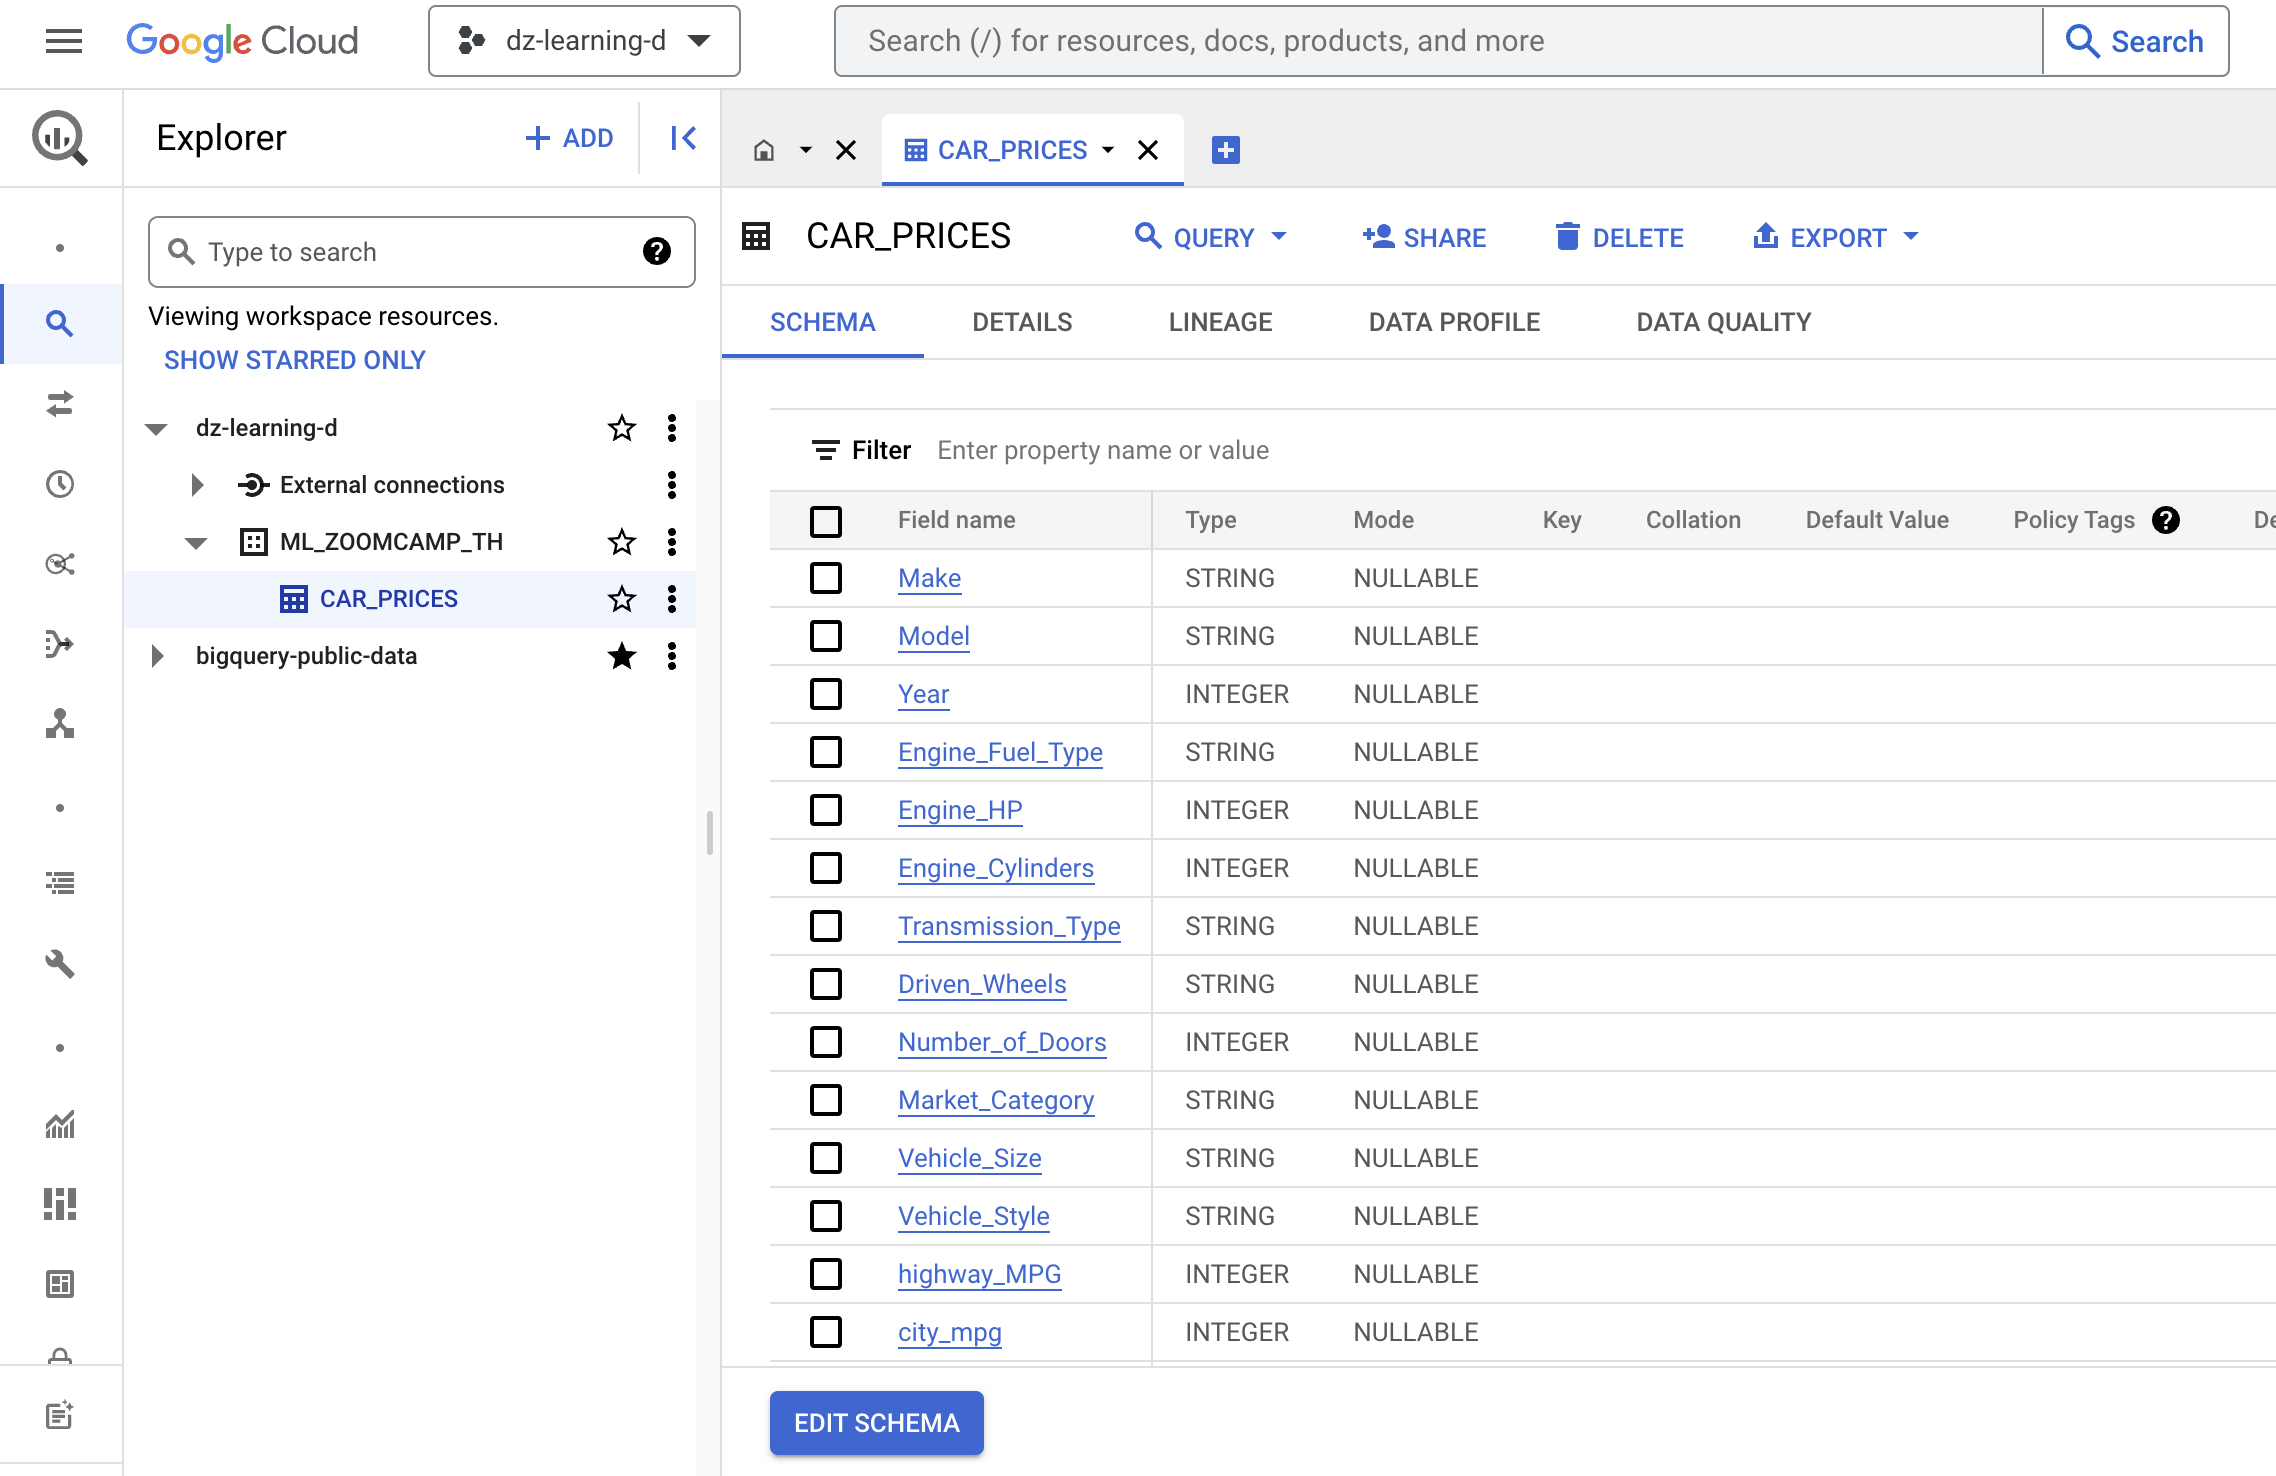

### 1. Data Preparation

In [ ]:
# Using bigframes to query table
import bigframes.pandas as bpd

bpd.options.bigquery.project = PROJECT_ID

df = bpd.read_gbq(f"{PROJECT_ID}.{DATASET}.{TABLE}")

HTML(value='Query job 1d289cba-df70-4bff-be50-477ad12c8a88 is RUNNING. <a target="_blank" href="https://consol…

In [ ]:
df.head()

HTML(value='Query job 5546238c-76e9-4ec0-8287-edd787e2e731 is DONE. 95.3 kB processed. <a target="_blank" href…

HTML(value='Query job 7bb8ede8-2e45-4dfd-a694-4a3e70fecca5 is DONE. 2.1 MB processed. <a target="_blank" href=…

Make       Model  Year             Engine_Fuel_Type  Engine_HP  \
0  BMW  1 Series M  2011  premium unleaded (required)        335   
1  BMW    1 Series  2011  premium unleaded (required)        300   
2  BMW    1 Series  2011  premium unleaded (required)        300   
3  BMW    1 Series  2011  premium unleaded (required)        230   
4  BMW    1 Series  2011  premium unleaded (required)        230   

   Engine_Cylinders Transmission_Type     Driven_Wheels  Number_of_Doors  \
0                 6            MANUAL  rear wheel drive                2   
1                 6            MANUAL  rear wheel drive                2   
2                 6            MANUAL  rear wheel drive                2   
3                 6            MANUAL  rear wheel drive                2   
4                 6            MANUAL  rear wheel drive                2   

                         Market_Category Vehicle_Size Vehicle_Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway_MPG  city_mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500  

[5 rows x 16 columns]

We'll start cleaning the data:

In [ ]:
df.columns = df.columns.str.lower()

In [ ]:
df.head()

HTML(value='Query job 04eebacb-b0f2-4ebb-9641-3dce072f5a5e is DONE. 0 Bytes processed. <a target="_blank" href…

HTML(value='Query job acb2809b-0c6f-4cea-9730-5c6e38980890 is DONE. 0 Bytes processed. <a target="_blank" href…

make       model  year             engine_fuel_type  engine_hp  \
0  BMW  1 Series M  2011  premium unleaded (required)        335   
1  BMW    1 Series  2011  premium unleaded (required)        300   
2  BMW    1 Series  2011  premium unleaded (required)        300   
3  BMW    1 Series  2011  premium unleaded (required)        230   
4  BMW    1 Series  2011  premium unleaded (required)        230   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0                 6            MANUAL  rear wheel drive                2   
1                 6            MANUAL  rear wheel drive                2   
2                 6            MANUAL  rear wheel drive                2   
3                 6            MANUAL  rear wheel drive                2   
4                 6            MANUAL  rear wheel drive                2   

                         market_category vehicle_size vehicle_style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500  

[5 rows x 16 columns]

In [ ]:
df.dtypes

make                 string[pyarrow]
model                string[pyarrow]
year                           Int64
engine_fuel_type     string[pyarrow]
engine_hp                      Int64
engine_cylinders               Int64
transmission_type    string[pyarrow]
driven_wheels        string[pyarrow]
number_of_doors                Int64
market_category      string[pyarrow]
vehicle_size         string[pyarrow]
vehicle_style        string[pyarrow]
highway_mpg                    Int64
city_mpg                       Int64
popularity                     Int64
msrp                           Int64
dtype: object

In [ ]:
strings = list(df.dtypes[df.dtypes == 'string'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [ ]:
for col in strings:
    df[col] = df[col].str.lower()

In [ ]:
df.head()

HTML(value='Query job e2b9e6a3-a2be-4dd8-b1b7-9cc809853e72 is DONE. 95.3 kB processed. <a target="_blank" href…

HTML(value='Query job 3e42cd05-1c50-4776-9b53-b59da2336e4d is DONE. 2.1 MB processed. <a target="_blank" href=…

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1 series m  2011  premium unleaded (required)        335   
1  bmw    1 series  2011  premium unleaded (required)        300   
2  bmw    1 series  2011  premium unleaded (required)        300   
3  bmw    1 series  2011  premium unleaded (required)        230   
4  bmw    1 series  2011  premium unleaded (required)        230   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0                 6            manual  rear wheel drive                2   
1                 6            manual  rear wheel drive                2   
2                 6            manual  rear wheel drive                2   
3                 6            manual  rear wheel drive                2   
4                 6            manual  rear wheel drive                2   

                         market_category vehicle_size vehicle_style  \
0  factory tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500  

[5 rows x 16 columns]

### 2. EDA (Exploratory Data Analysis)

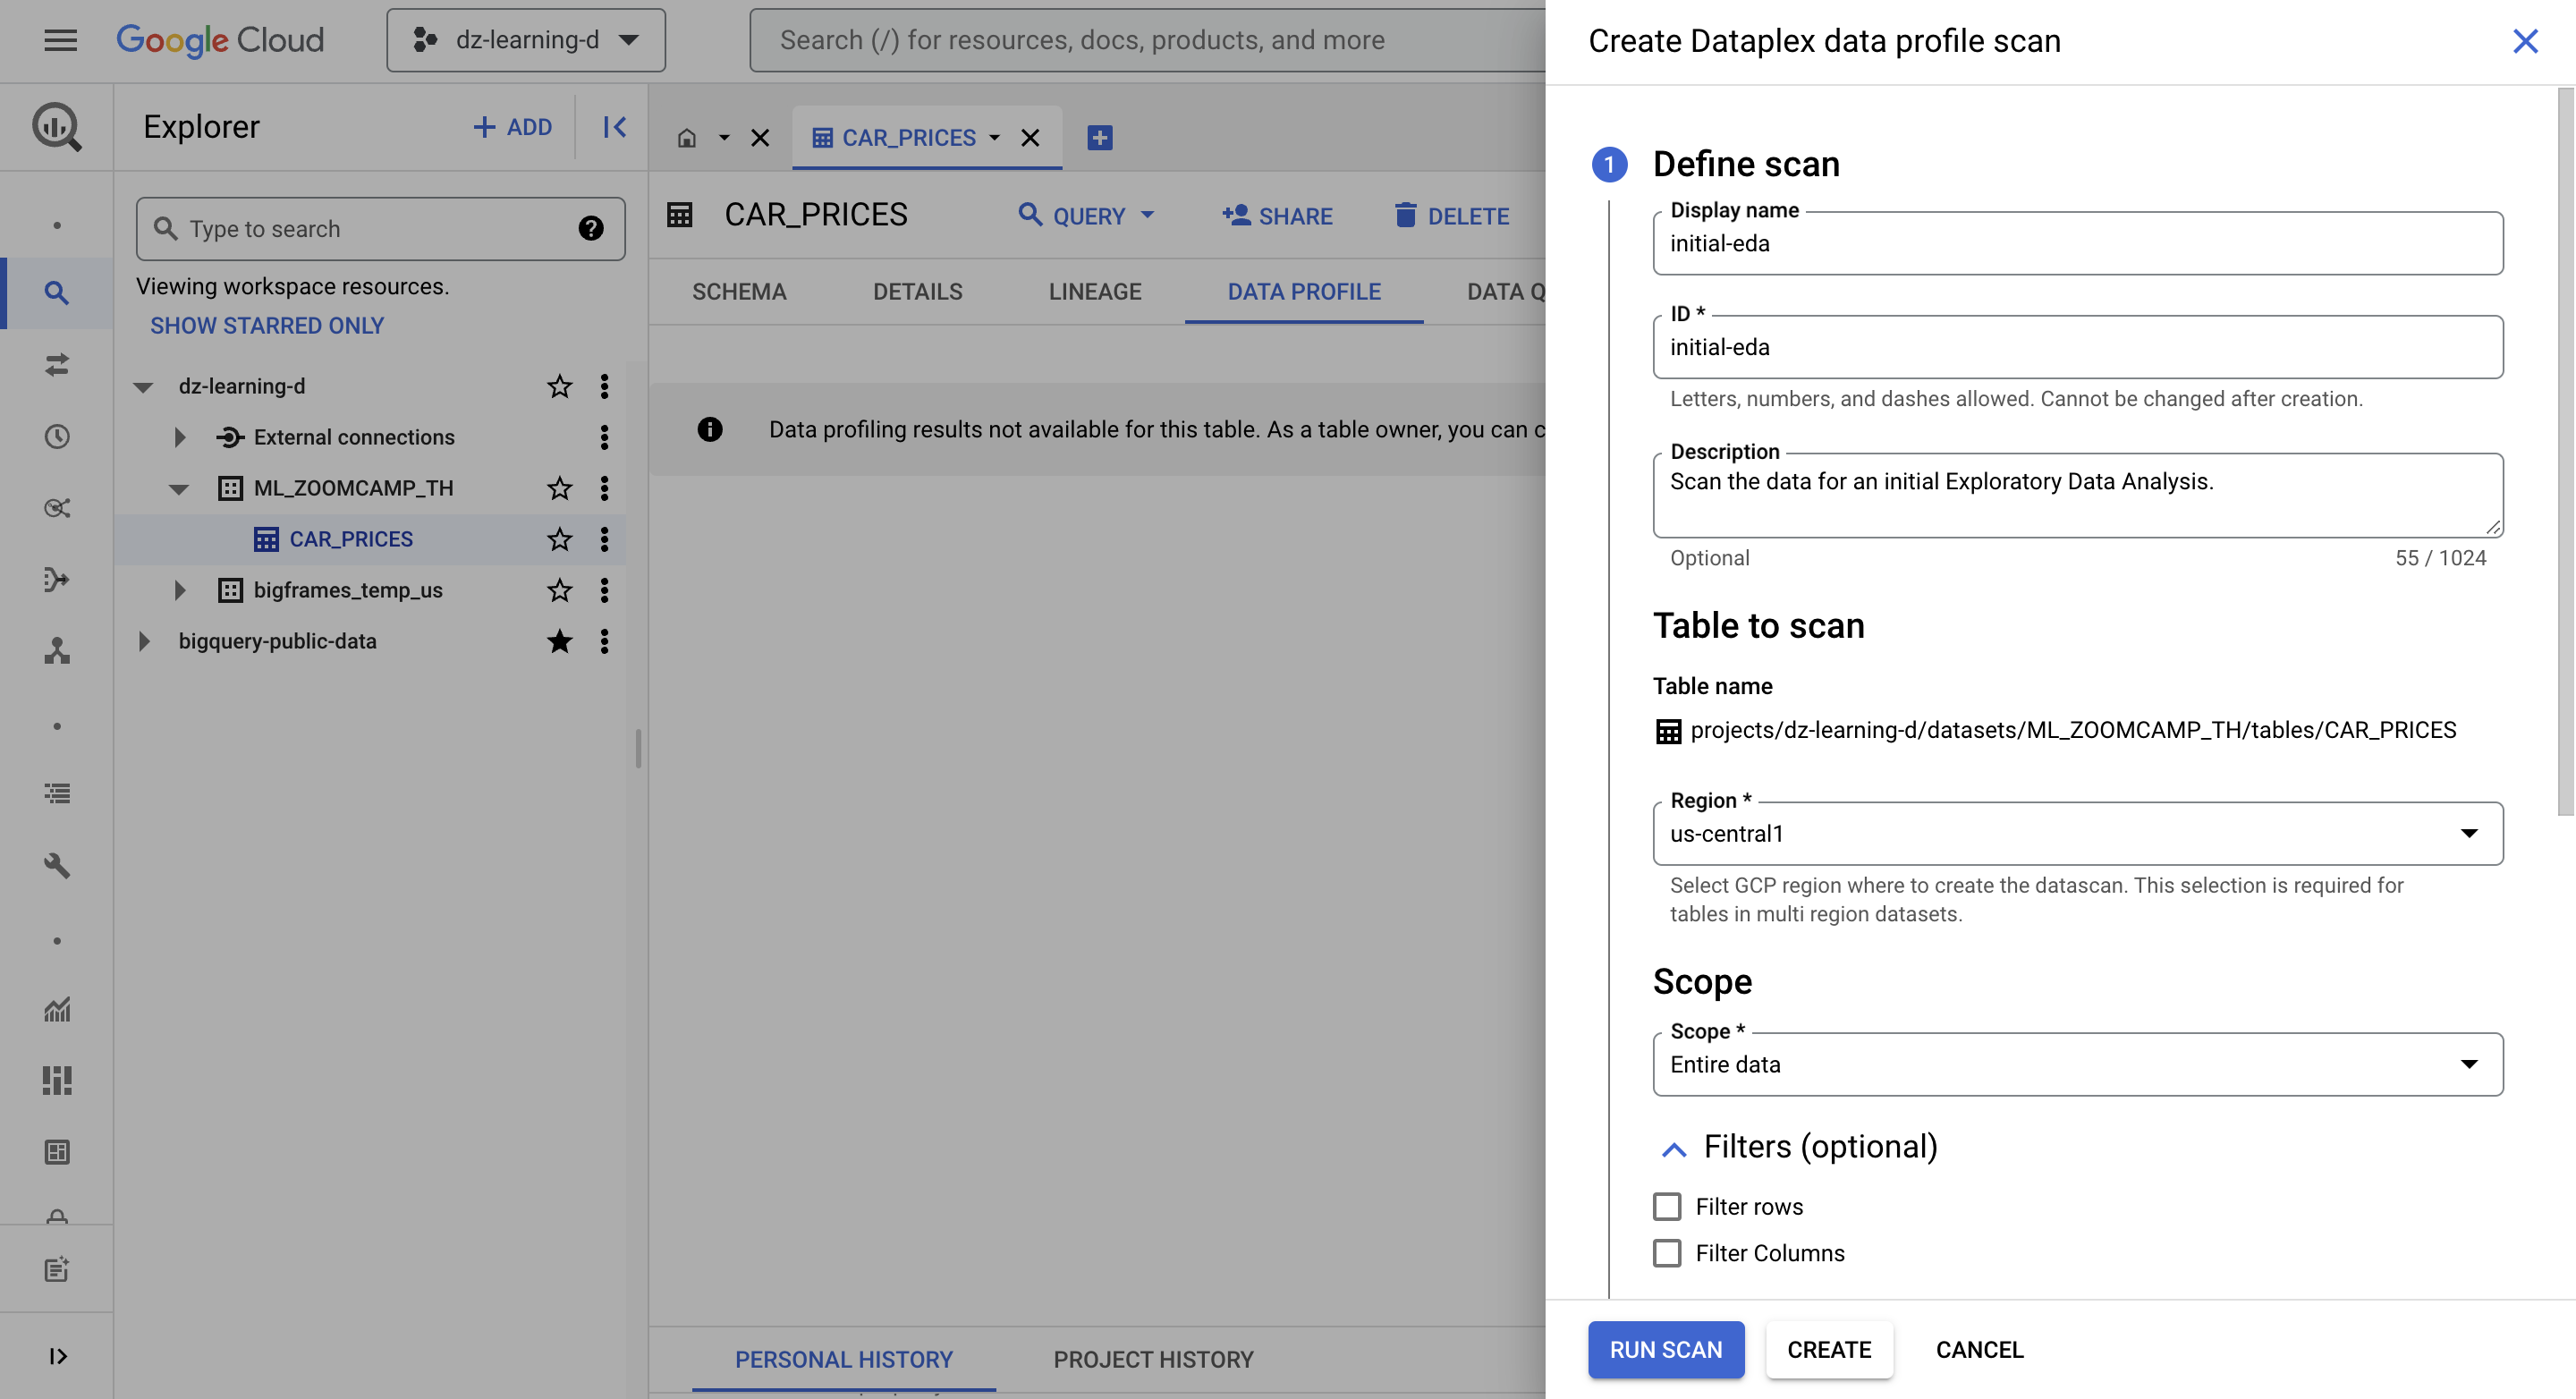

With BigQuery we're able to instantaneously get a data profile (which allows us to check columns statistics from the beginning):

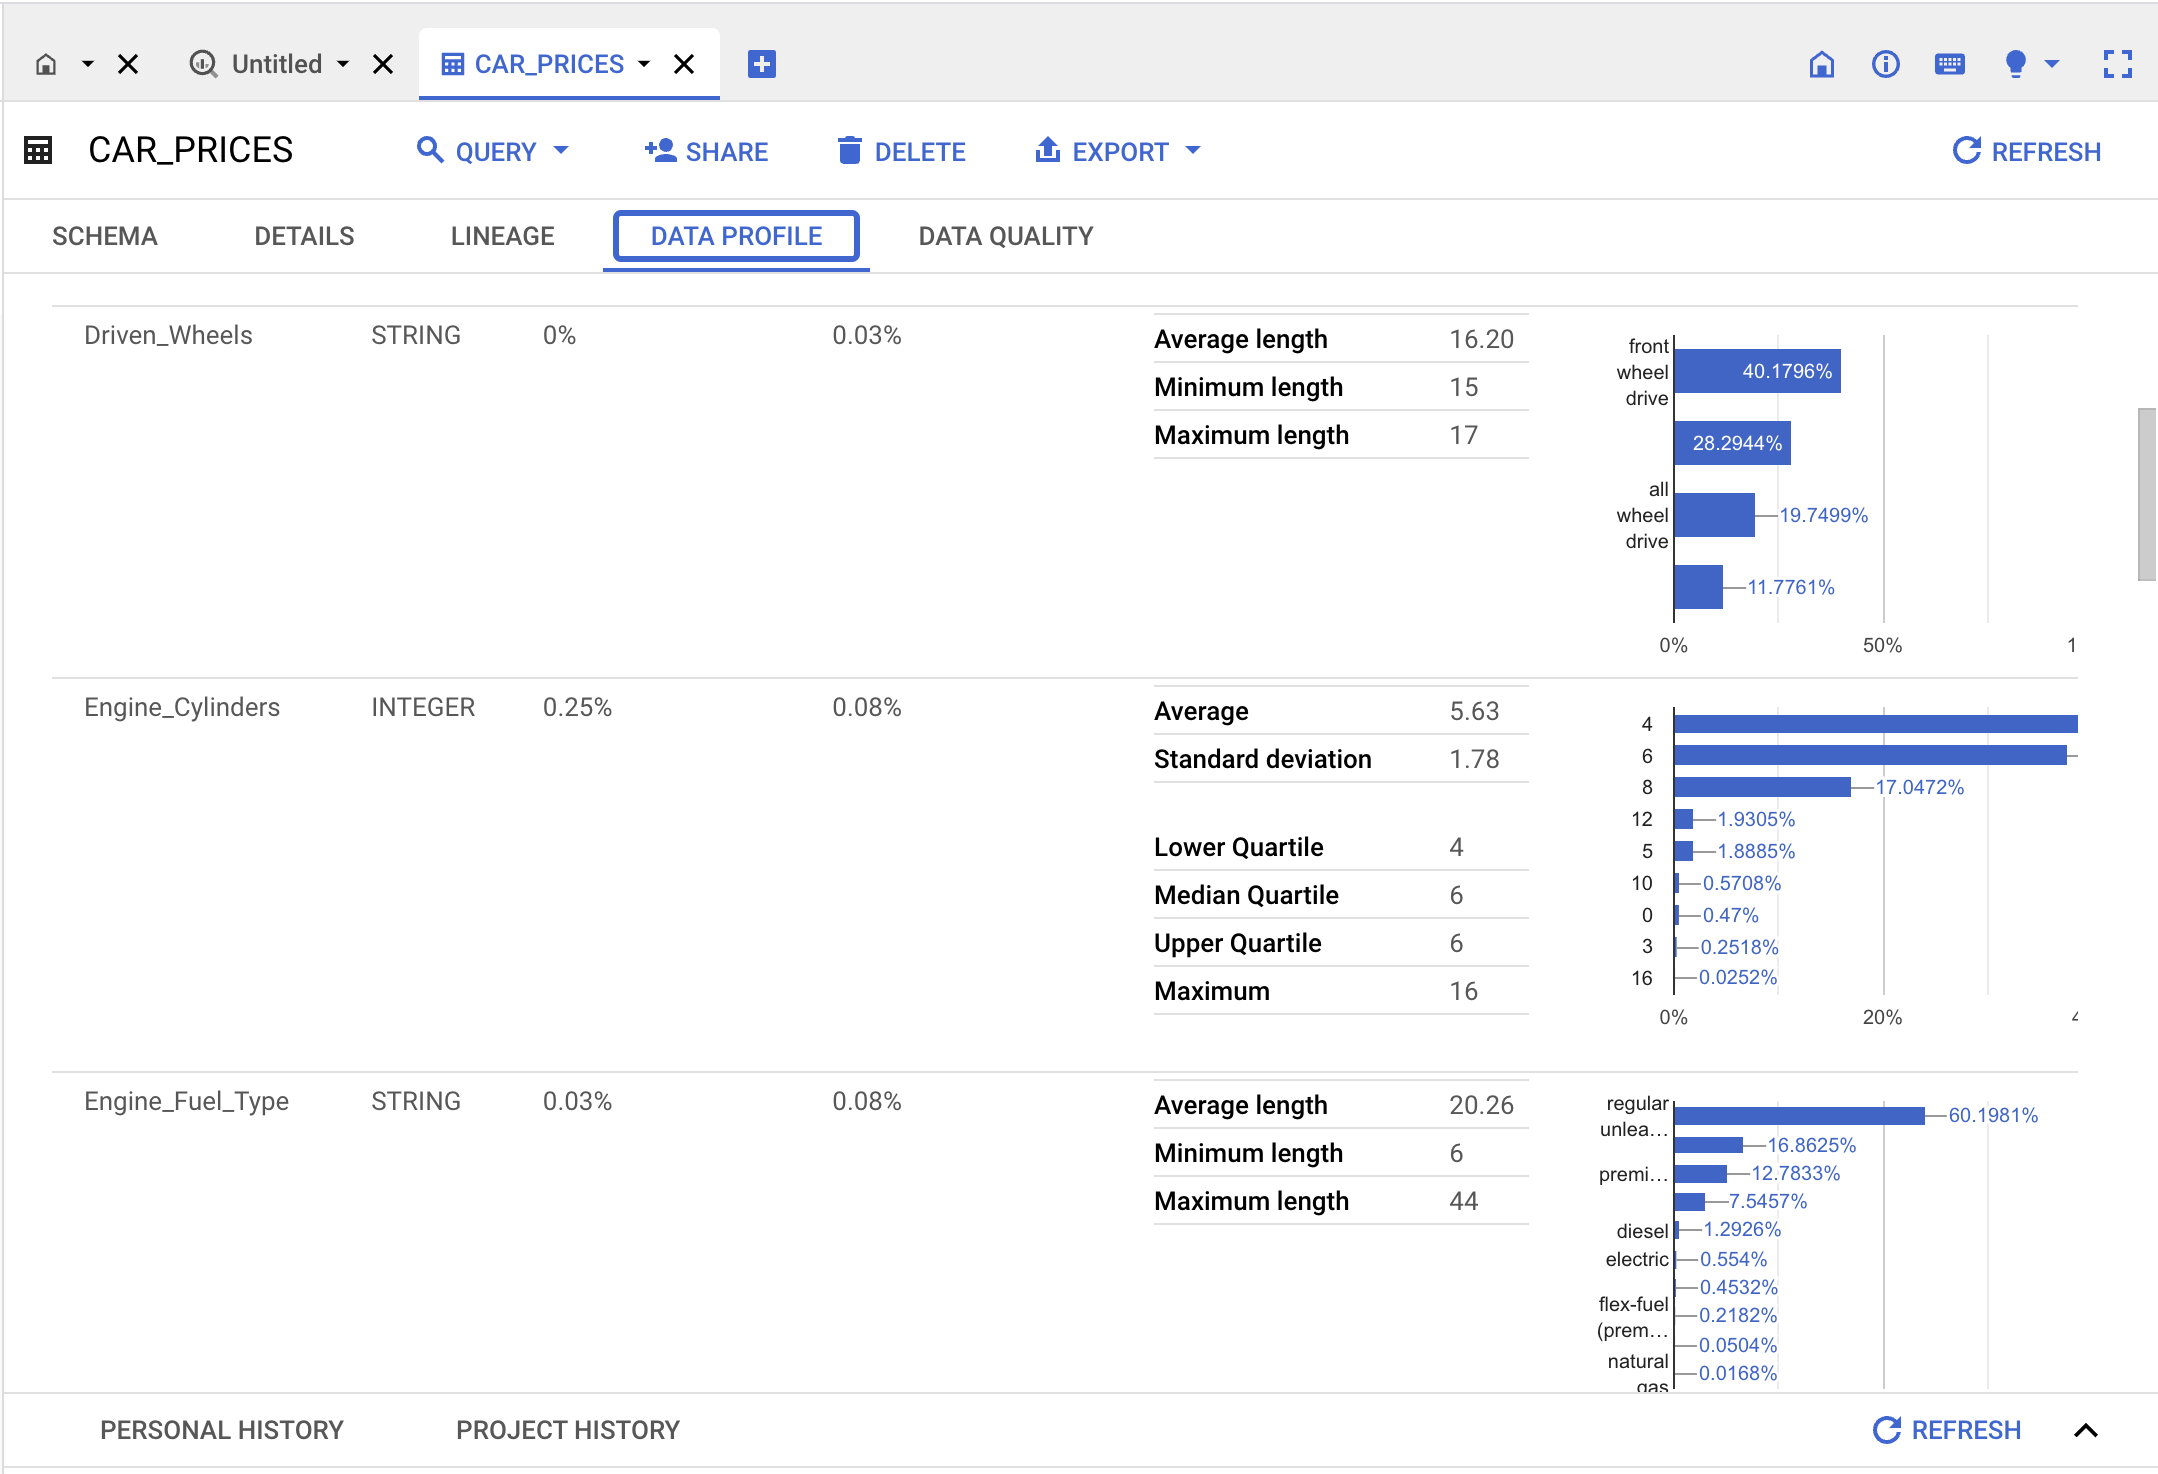

What makes bigframes and pandas different? Where exactly calculations are happening: 
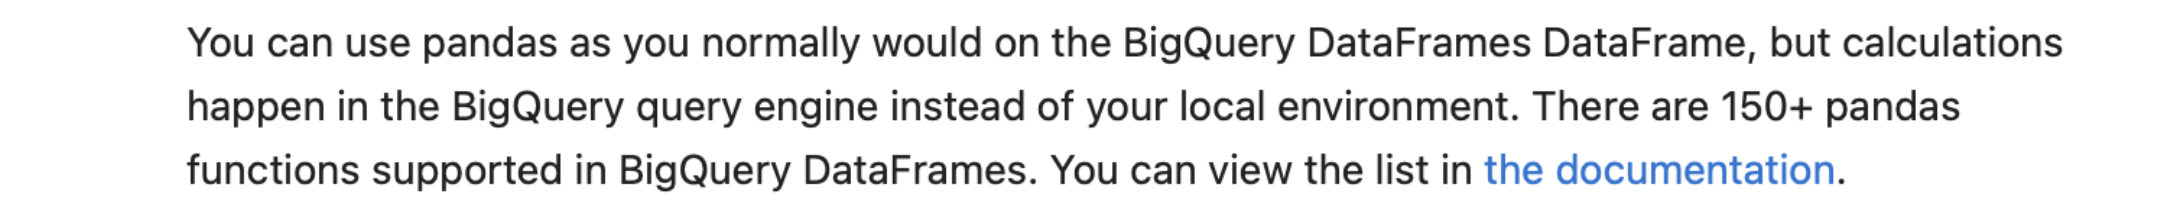

Testing the `bigframes` dataframes I noticed there were some processes where it is prefered to use regular pandas (as when using `seaborn` for additional analysis). This is why I figured out a way to go back and forward as per our convenience.



In [ ]:
import pandas as pd

def to_pandas(bigframes):
    return bigframes.to_pandas()
def to_bigframes(pandas):
    return bpd.read_pandas(pandas)

Bigframes to Pandas:

In [ ]:
df.dtypes

make                 string[pyarrow]
model                string[pyarrow]
year                           Int64
engine_fuel_type     string[pyarrow]
engine_hp                      Int64
engine_cylinders               Int64
transmission_type    string[pyarrow]
driven_wheels        string[pyarrow]
number_of_doors                Int64
market_category      string[pyarrow]
vehicle_size         string[pyarrow]
vehicle_style        string[pyarrow]
highway_mpg                    Int64
city_mpg                       Int64
popularity                     Int64
msrp                           Int64
dtype: object

In [ ]:
df_pd = to_pandas(df)
df_pd.head()

HTML(value='Query job 1f167de9-499d-4649-83e3-41277fa9acc6 is RUNNING. <a target="_blank" href="https://consol…

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1 series m  2011  premium unleaded (required)      335.0   
1  bmw    1 series  2011  premium unleaded (required)      300.0   
2  bmw    1 series  2011  premium unleaded (required)      300.0   
3  bmw    1 series  2011  premium unleaded (required)      230.0   
4  bmw    1 series  2011  premium unleaded (required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear wheel drive              2.0   
1               6.0            manual  rear wheel drive              2.0   
2               6.0            manual  rear wheel drive              2.0   
3               6.0            manual  rear wheel drive              2.0   
4               6.0            manual  rear wheel drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [ ]:
type(df_pd)

pandas.core.frame.DataFrame

Pandas to Bigframes:

In [ ]:
df_bf = to_bigframes(df_pd)
df_bf.head()

HTML(value='Load job 3c371809-2a8e-4b9f-bbd7-4ace061c8213 is RUNNING. <a target="_blank" href="https://console…

HTML(value='Query job 3dfd2dae-0ac0-4482-bd30-5aa762088f64 is DONE. 95.3 kB processed. <a target="_blank" href…

HTML(value='Query job 2e9b6fce-c148-4375-b7c6-484f0ba9f115 is DONE. 2.2 MB processed. <a target="_blank" href=…

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1 series m  2011  premium unleaded (required)      335.0   
1  bmw    1 series  2011  premium unleaded (required)      300.0   
2  bmw    1 series  2011  premium unleaded (required)      300.0   
3  bmw    1 series  2011  premium unleaded (required)      230.0   
4  bmw    1 series  2011  premium unleaded (required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear wheel drive              2.0   
1               6.0            manual  rear wheel drive              2.0   
2               6.0            manual  rear wheel drive              2.0   
3               6.0            manual  rear wheel drive              2.0   
4               6.0            manual  rear wheel drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500  

[5 rows x 16 columns]

In [ ]:
type(df_bf)

bigframes.dataframe.DataFrame

Ok, so for this part of the analysis we'll work with `pandas`:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

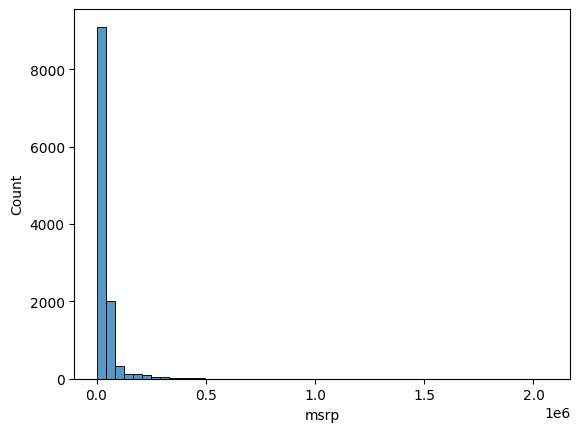

In [ ]:
sns.histplot(df_pd.msrp, bins = 50)

<Axes: xlabel='msrp', ylabel='Count'>

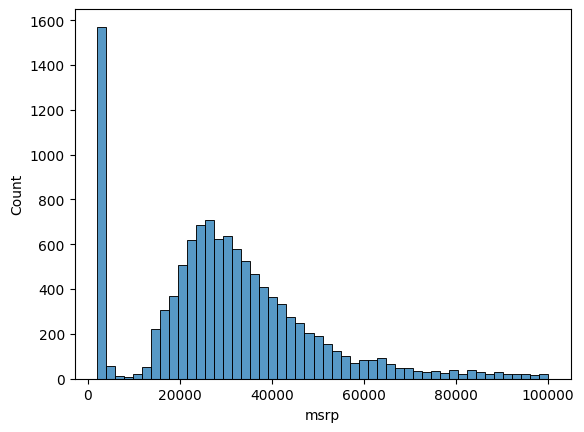

In [ ]:
# Handle long tail (zoom in)
sns.histplot(df_pd.msrp[df_pd.msrp < 100000], bins = 50)

<Axes: xlabel='msrp', ylabel='Count'>

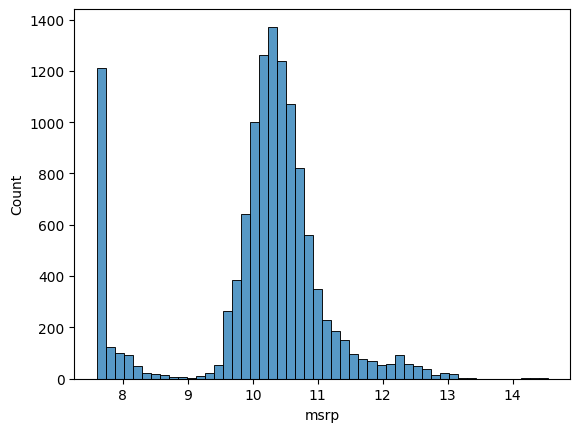

In [ ]:
import numpy as np

price_logs = np.log1p(df_pd.msrp)
sns.histplot(price_logs, bins = 50)

Tail is gone (look at https://g.co/bard/share/af47a113c2d6 to see why we need to remove the skewness of the dependent variable).

Expected distribution for the dependent variable:
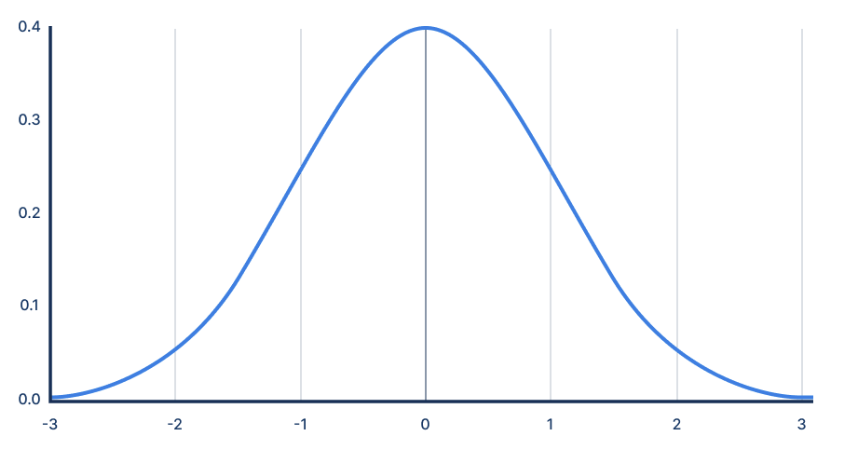

In [ ]:
df_pd['log_msrp'] = np.log1p(df_pd.msrp)

Now, let's check missing values:

In [ ]:
try:
    df_pd.market_category[df_pd.market_category.str.contains('n/a')] = None
except:
    print('Already transformed.')

Already transformed.


In [ ]:
df_pd.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
log_msrp                0
dtype: int64

We can also check the null percentage in the BQ profiler: 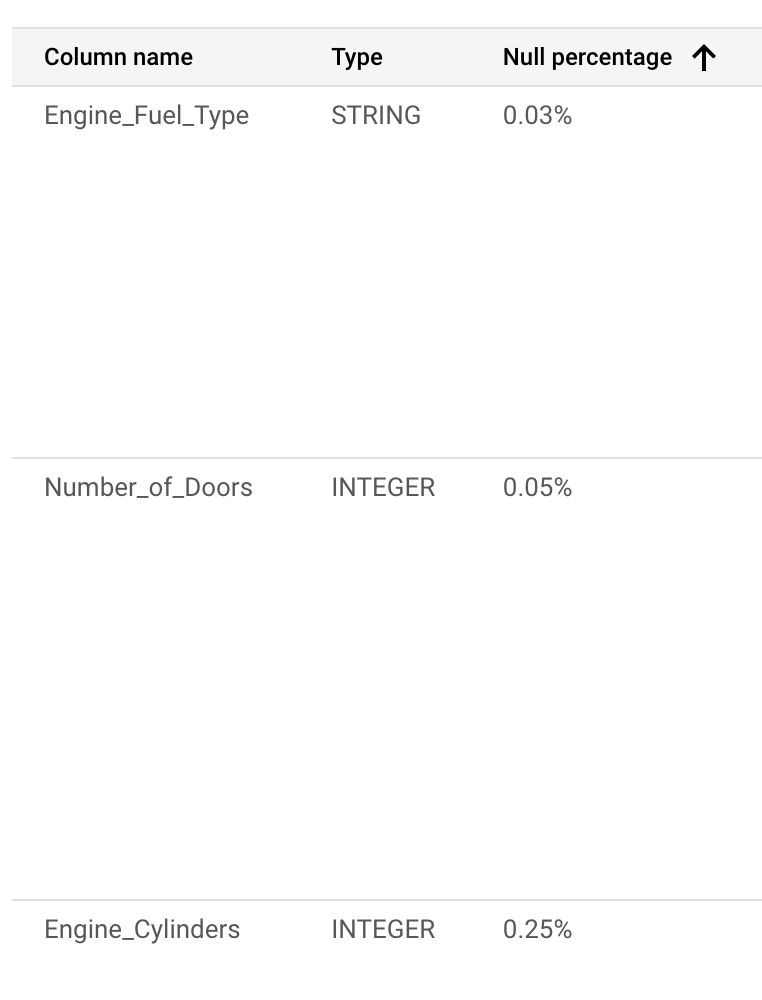

### Setting up validation framework

In [ ]:
df_bf = to_bigframes(df_pd)

HTML(value='Load job 9b52796d-8c86-473c-a314-35515ad7a5aa is RUNNING. <a target="_blank" href="https://console…

In [ ]:
df_bf.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp', 'log_msrp'],
      dtype='object')

In [ ]:
from bigframes.ml.model_selection import train_test_split

feature_columns = df_bf[['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity']]

label_columns = df_bf[['log_msrp']]

X_train_val, X_test, y_train_val, y_test = train_test_split(
  feature_columns, label_columns, test_size=0.2, random_state = 2)
X_train, X_val, y_train, y_val = train_test_split(
  X_train_val, y_train_val, train_size=0.8, random_state = 2)

HTML(value='Query job 133cd8fe-2d0a-4577-9531-19a22ddaa674 is DONE. 0 Bytes processed. <a target="_blank" href…

HTML(value='Query job 1d830906-ab8d-4e6b-a8fd-ddfc9c5a4264 is DONE. 95.3 kB processed. <a target="_blank" href…

### 3. Linear Regression 
#### 3.1 Theory Behind the Model

When we suppose our function `g` is linear.
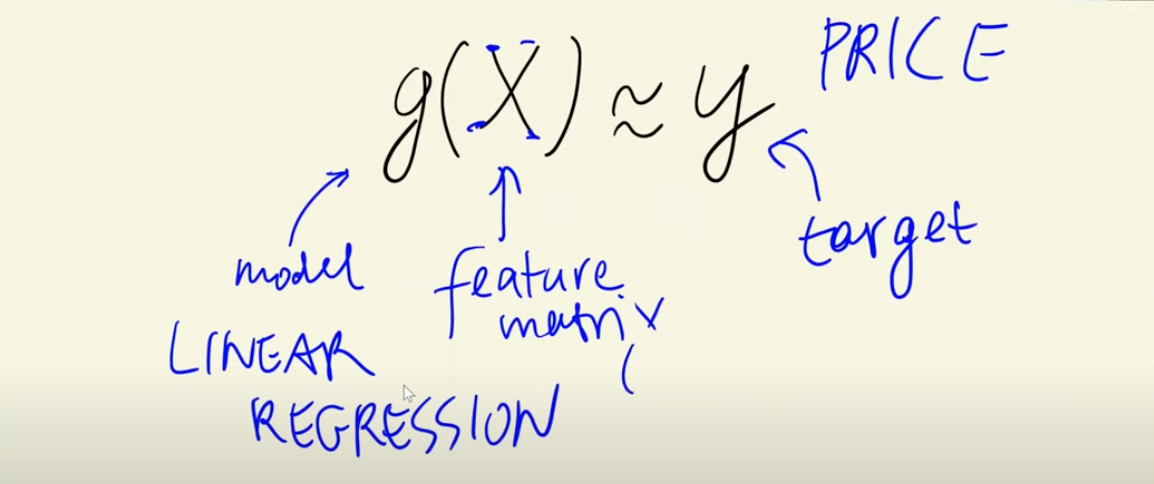

From the [ML Glossary definition](https://developers.google.com/machine-learning/glossary#linear-regression):

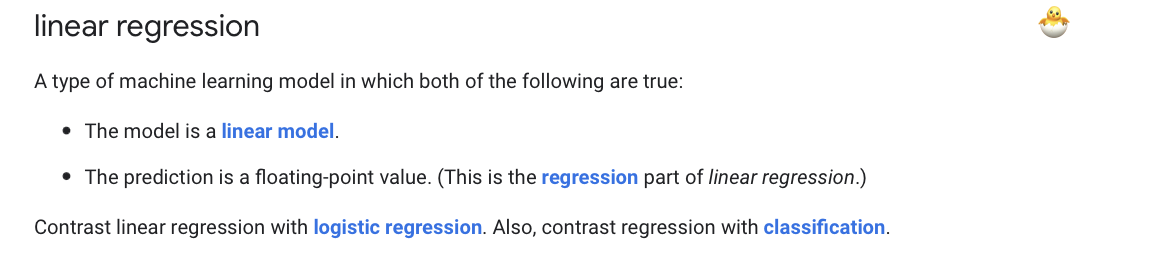

If we thing of one example `xi`:

In [ ]:
X_train.iloc[10]

HTML(value='Query job e2890997-e5d0-4c85-ae1c-594c0d88a53a is RUNNING. <a target="_blank" href="https://consol…

make                           toyota
model                         sequoia
year                             2016
engine_fuel_type     regular unleaded
engine_hp                       381.0
engine_cylinders                  8.0
transmission_type           automatic
driven_wheels        four wheel drive
number_of_doors                   4.0
market_category                  <NA>
vehicle_size                    large
vehicle_style                 4dr suv
highway_mpg                        17
city_mpg                           13
popularity                       2031
Name: 9128, dtype: object

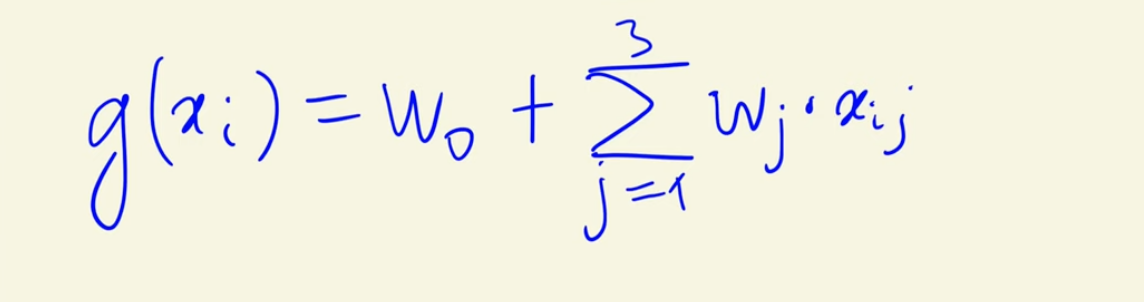

Remember dot product?

In [ ]:
xi = np.array([1, 381.0, 8, 4, 17, 13, 2031])
w = np.full(7, .01) # [w0, w1, w2, ...

def g(xi,w):
    return xi.dot(w)

In [ ]:
g(xi,w) # Log of price

24.55

Now, for all the examples, remember matrices?

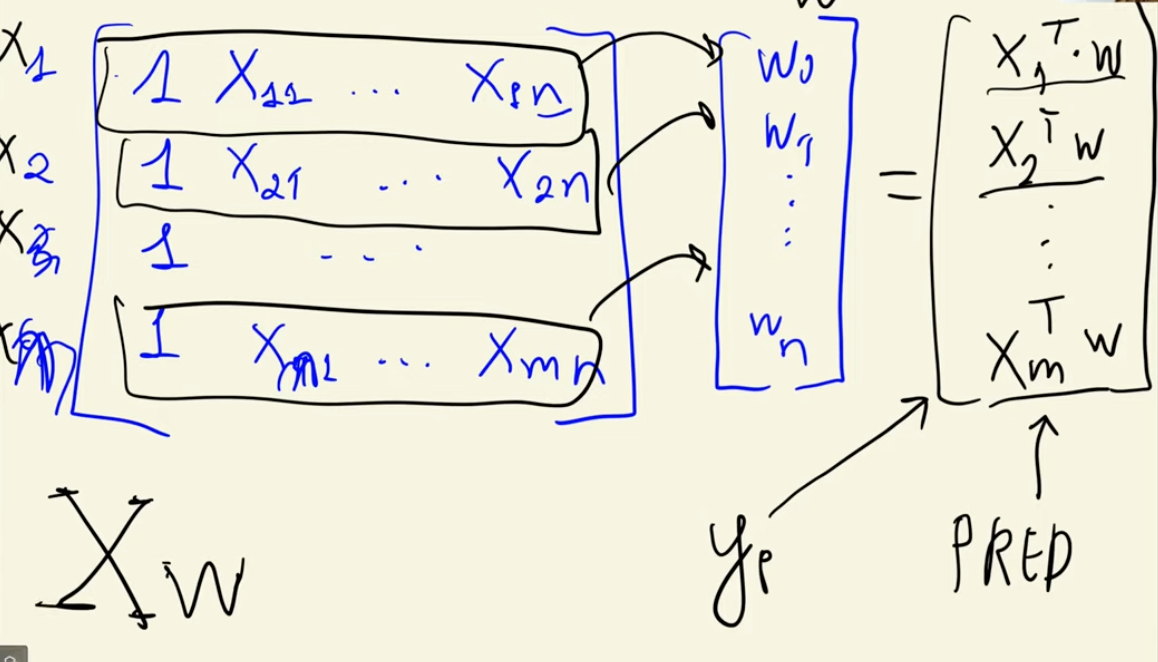

To obtain the `w` we use linear algebra.
- We want a squared Matrix to be able to obtain the Inverse:
  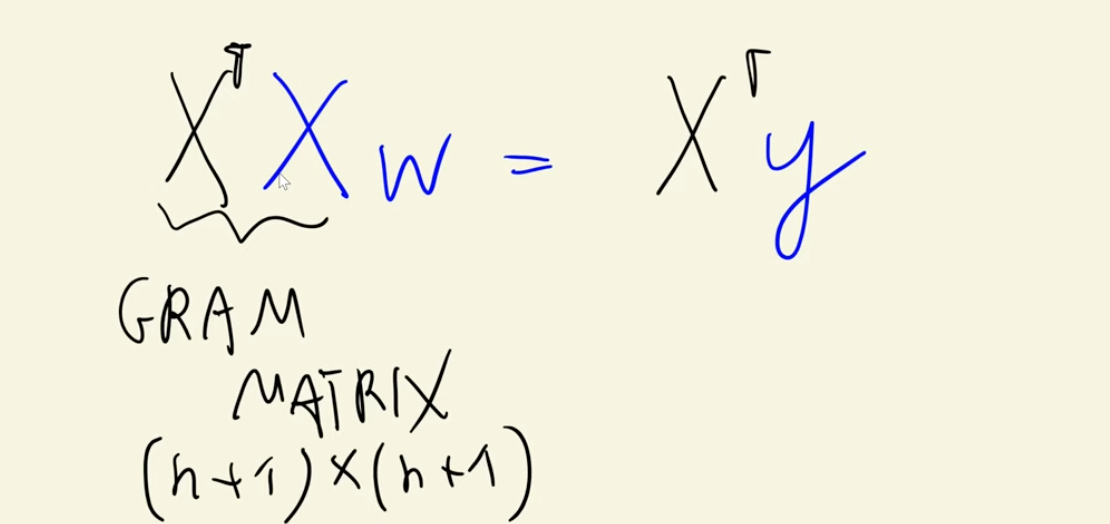
- This way:
  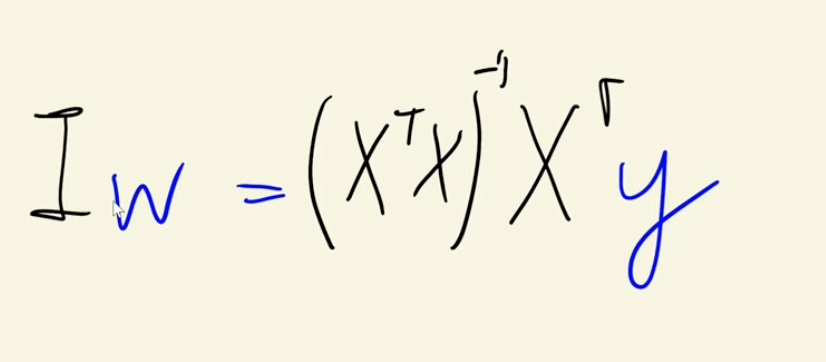

To evaluate how good the predictions use metrics such as the Mean Squared Error or Mean Absolute Error. From [ML glossary](https://developers.google.com/machine-learning/glossary#mean-squared-error-mse):
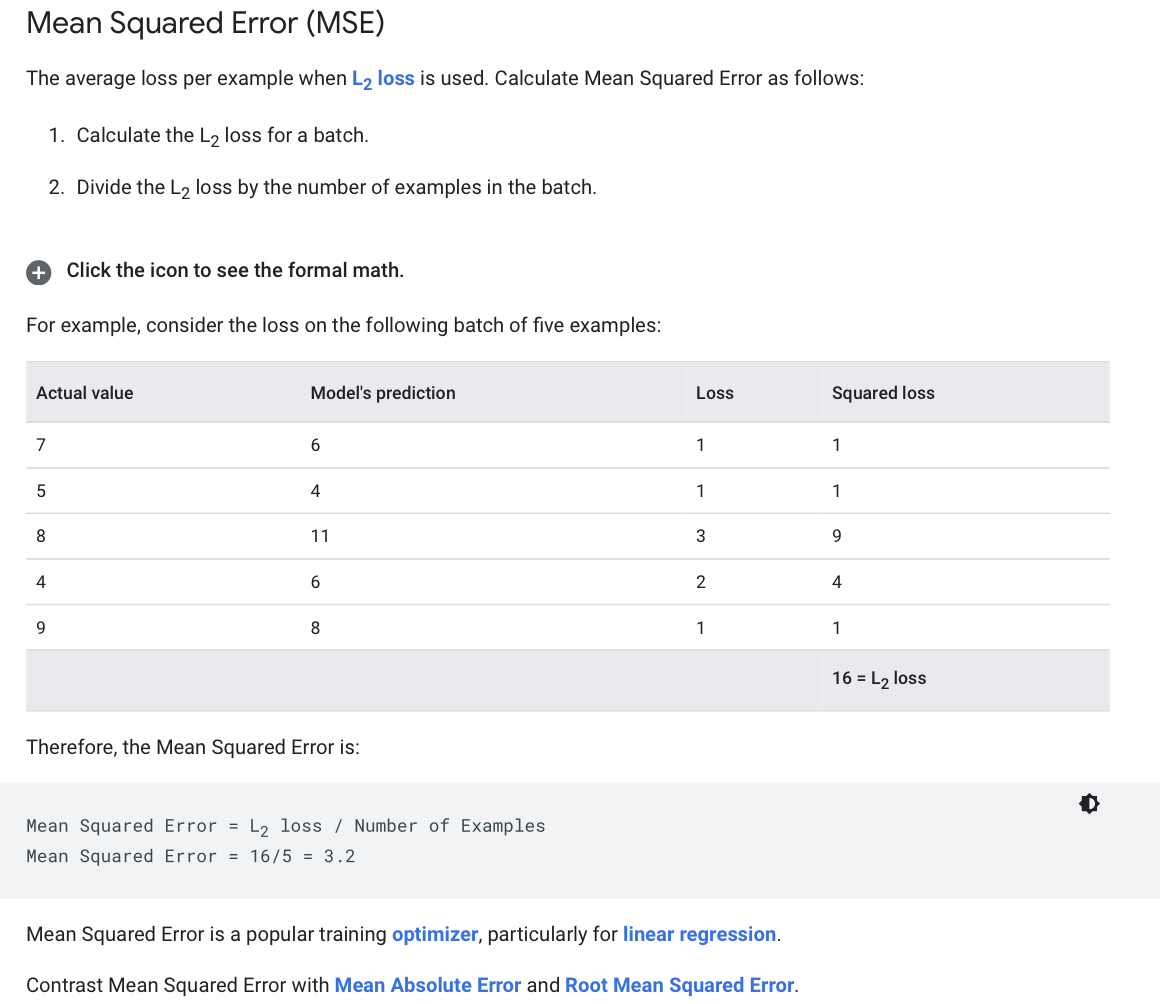

From the Zoomcamp (Root Mean Squared Error):

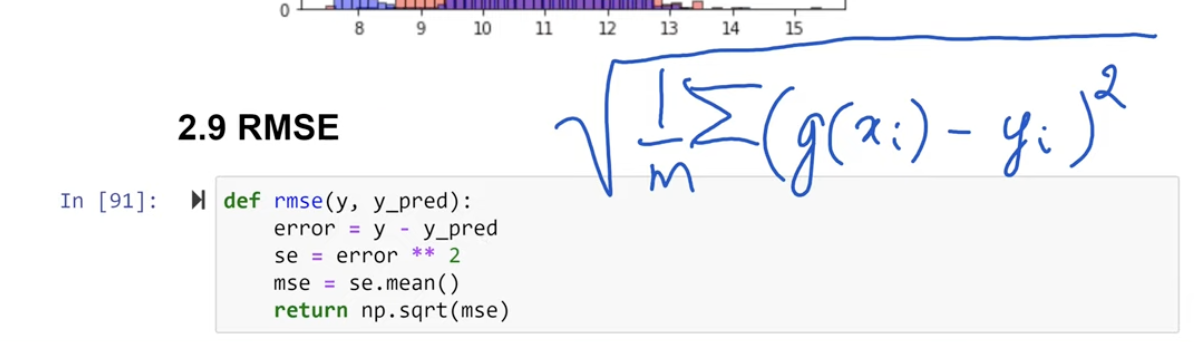

As we will see, there are a lot of libraries and tools to calculate weights, metrics, and to perform preprocessing when using Machine Learning. However, it is important to know the theory behind the calculations to best interpret the results we obtain.

#### 3.2 Baseline Model (Numerical Features Only)

In [ ]:
X_train.dtypes

make                 string[pyarrow]
model                string[pyarrow]
year                           Int64
engine_fuel_type     string[pyarrow]
engine_hp                    Float64
engine_cylinders             Float64
transmission_type    string[pyarrow]
driven_wheels        string[pyarrow]
number_of_doors              Float64
market_category      string[pyarrow]
vehicle_size         string[pyarrow]
vehicle_style        string[pyarrow]
highway_mpg                    Int64
city_mpg                       Int64
popularity                     Int64
dtype: object

In [ ]:
from bigframes.ml.linear_model import LinearRegression

X_train_num = X_train[[
    'engine_hp', 'engine_cylinders','highway_mpg', 
    'city_mpg', 'popularity',
]]
model = LinearRegression()

model.fit(X_train_num, y_train)

HTML(value='Query job 389dbb4f-7f8f-465a-8926-c80b1dfe456a is RUNNING. <a target="_blank" href="https://consol…

LinearRegression()

In [ ]:
# check how the model performed in training set:
model.score(X_train_num, y_train)

HTML(value='Query job 781862a8-49a6-48ff-825e-70e2effeaea1 is RUNNING. <a target="_blank" href="https://consol…

HTML(value='Query job 917ba19d-e76c-4988-9cce-72a54b6a672a is RUNNING. <a target="_blank" href="https://consol…

HTML(value='Query job 8b7ee1de-ec07-4060-a67e-0ca1f8b59645 is DONE. 0 Bytes processed. <a target="_blank" href…

HTML(value='Query job ba2f7e72-e659-4a73-b4e1-a25c5905b680 is DONE. 56 Bytes processed. <a target="_blank" hre…

mean_absolute_error  mean_squared_error  mean_squared_log_error  \
0             0.553874            0.570992                0.005486   

   median_absolute_error  r2_score  explained_variance  
0                0.39008  0.540701            0.540701  

[1 rows x 6 columns]

In [ ]:
# check how the model performed in validation set:
X_val_num = X_val[[
    'engine_hp', 'engine_cylinders','highway_mpg', 
    'city_mpg', 'popularity',
]]

model.score(X_val_num, y_val)

HTML(value='Query job 4ab11051-9f4e-4032-bfee-4e6ca60a642d is RUNNING. <a target="_blank" href="https://consol…

HTML(value='Query job b1788427-76b9-479f-b554-317967b91545 is RUNNING. <a target="_blank" href="https://consol…

HTML(value='Query job 6a8d6f8a-df1f-4b02-9d1d-0f6a0327fb3e is DONE. 0 Bytes processed. <a target="_blank" href…

HTML(value='Query job 14d6b4fa-3e88-4d52-b829-c0923e6c7a91 is DONE. 56 Bytes processed. <a target="_blank" hre…

mean_absolute_error  mean_squared_error  mean_squared_log_error  \
0             0.558659            0.584192                0.005655   

   median_absolute_error  r2_score  explained_variance  
0               0.394889   0.51946            0.519469  

[1 rows x 6 columns]

#### 3.3 Feature Engineering

Adding variables that aren't initially numeric.

In [ ]:
df_bf['age'] = 2017 - df_bf.year

In [ ]:
feature_columns = df_bf[[
    'engine_hp', 'engine_cylinders','highway_mpg', 
    'city_mpg', 'popularity', 'age'
]]
label_columns = df_bf[['log_msrp']]

X_train_val, X_test, y_train_val, y_test = train_test_split(
  feature_columns, label_columns, test_size=0.2, random_state = 2)
X_train, X_val, y_train, y_val = train_test_split(
  X_train_val, y_train_val, train_size=0.8, random_state = 2)

HTML(value='Query job 296f03cb-e79f-402e-830f-de26b69efb6e is DONE. 0 Bytes processed. <a target="_blank" href…

HTML(value='Query job d6cccfd1-64f7-4a07-85e8-1ad18c7b99b4 is DONE. 95.3 kB processed. <a target="_blank" href…

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

HTML(value='Query job cc11e604-5c0a-41b5-addc-61859e3bd427 is RUNNING. <a target="_blank" href="https://consol…

LinearRegression()

In [ ]:
# check how the model performed in validation set:
model.score(X_val, y_val)

HTML(value='Query job 1dbe0ac3-1f4d-49fa-aaf3-827312ca8fe9 is RUNNING. <a target="_blank" href="https://consol…

HTML(value='Query job c4fd9d43-cfc1-4d42-9328-37d32ddb729a is RUNNING. <a target="_blank" href="https://consol…

HTML(value='Query job aafaf6cc-4b6d-4ab7-a085-bebd3509020c is DONE. 0 Bytes processed. <a target="_blank" href…

HTML(value='Query job d264f8f9-8b8b-42da-a6de-995ab56f3823 is DONE. 56 Bytes processed. <a target="_blank" hre…

mean_absolute_error  mean_squared_error  mean_squared_log_error  \
0             0.392539            0.266472                0.002368   

   median_absolute_error  r2_score  explained_variance  
0               0.299273  0.780807             0.78081  

[1 rows x 6 columns]

We can see how our MSE went from 0.584192 to 0.266472 (on the validation dataset). Let's plot the distributions of our predictions vs. the real values:

In [ ]:
y_val_pred = model.predict(X_val)

HTML(value='Query job a4f52498-9ce1-4353-a49b-be9ca5402260 is RUNNING. <a target="_blank" href="https://consol…

HTML(value='Query job 4edd5c4d-b045-470d-84c2-7ccc3e81472e is DONE. 15.2 kB processed. <a target="_blank" href…

In [ ]:
dist1 = to_pandas(y_val_pred)
dist2 = to_pandas(y_val)

HTML(value='Query job 1609d819-2f3e-4a9d-9add-99c883724b0e is DONE. 0 Bytes processed. <a target="_blank" href…

HTML(value='Query job 5d81b29a-5e38-45a5-a607-27811195e4ef is DONE. 0 Bytes processed. <a target="_blank" href…

<Axes: ylabel='Density'>

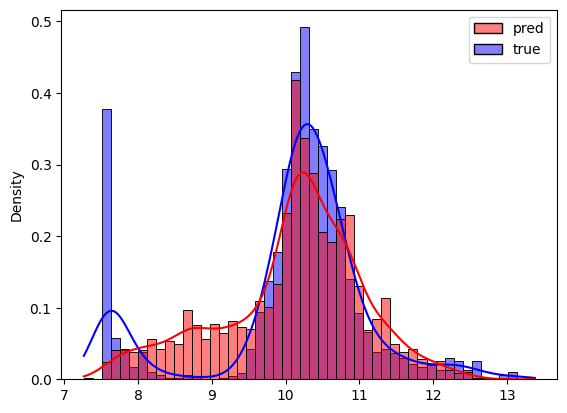

In [ ]:
sns.histplot(
    {'pred': np.ravel(dist1), 
     'true': np.ravel(dist2),
    }, 
    bins = 50, 
    palette = ['red', 'blue'],
    alpha = 0.5, 
    kde=True, 
    stat='density',
)

In general it's doing good (there's room for improvement).

### 3.4 Categorical Variables
From the[ML Glossary](https://developers.google.com/machine-learning/glossary#categorical-data):
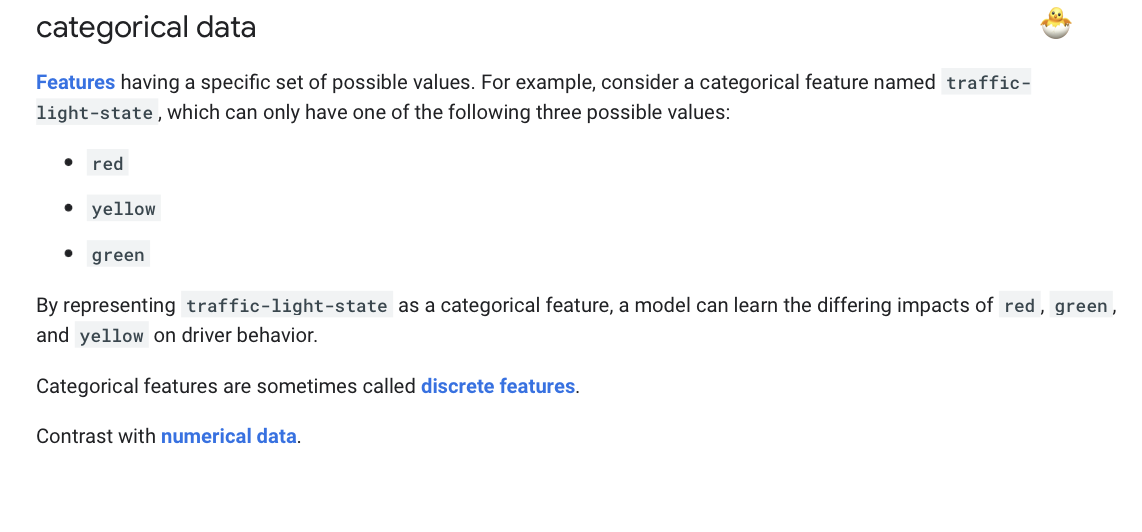

For these variables we use something called [one-hot encoding](https://developers.google.com/machine-learning/glossary#one-hot-encoding):

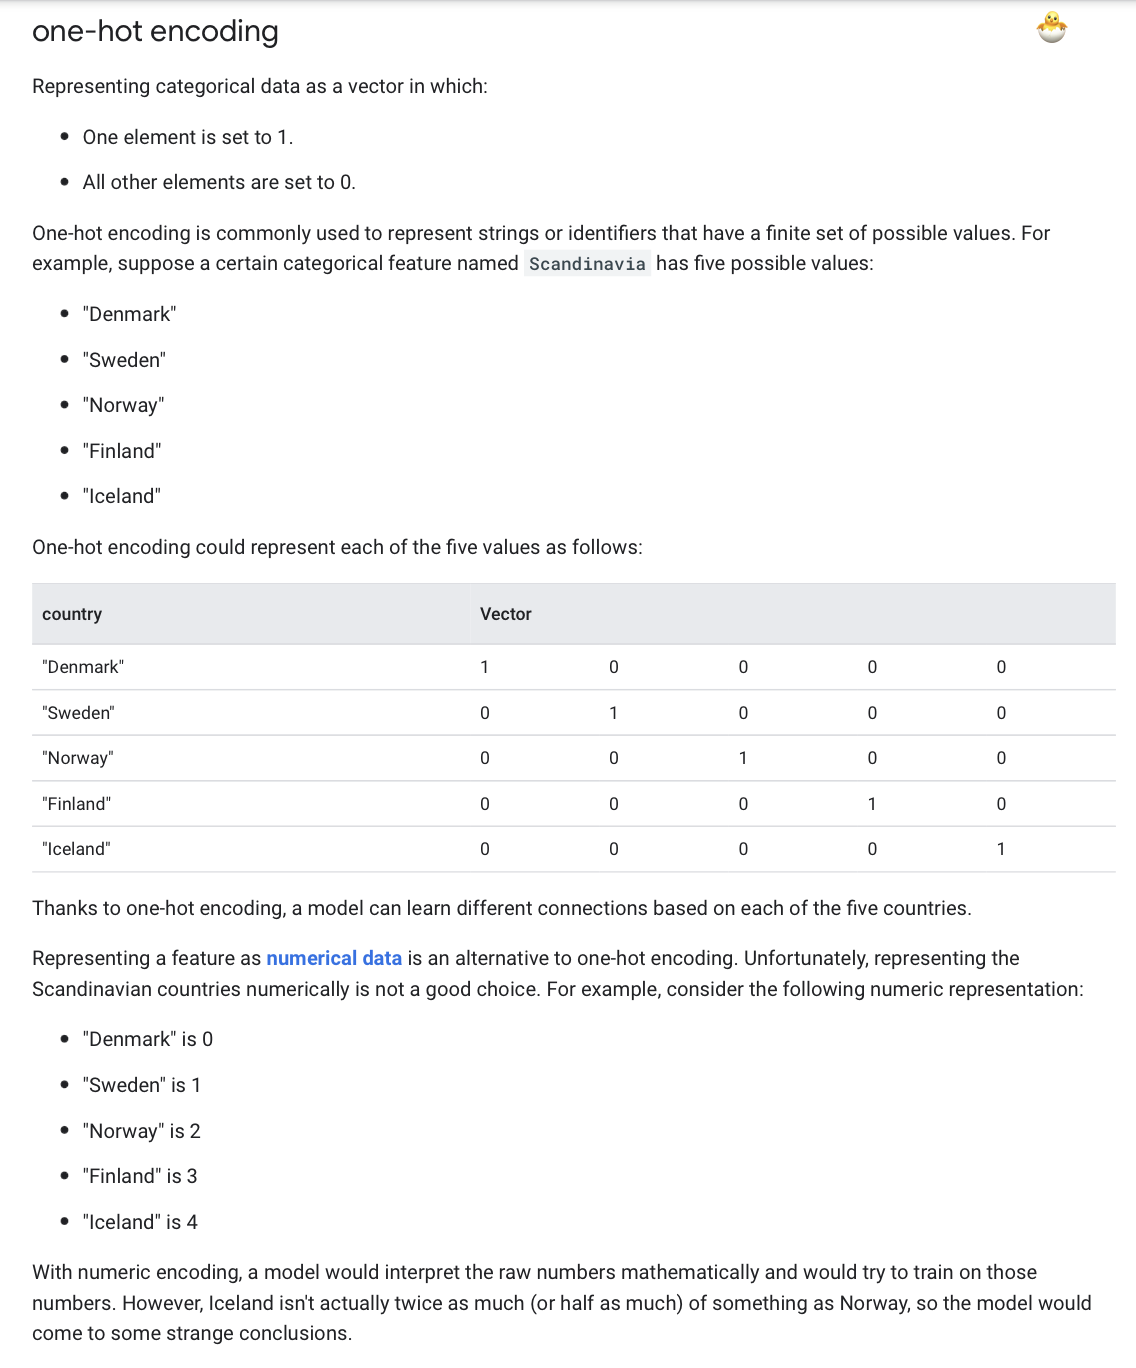

In [ ]:
cat_features = ['make', 'model', 'engine_fuel_type', 
       'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 
        'vehicle_style']
num_features = ['engine_hp', 'engine_cylinders','highway_mpg', 
    'city_mpg', 'popularity', 'age']

In [ ]:
df_bf[cat_features].dtypes

make                 string[pyarrow]
model                string[pyarrow]
engine_fuel_type     string[pyarrow]
transmission_type    string[pyarrow]
driven_wheels        string[pyarrow]
number_of_doors              Float64
market_category      string[pyarrow]
vehicle_size         string[pyarrow]
vehicle_style        string[pyarrow]
dtype: object

In [ ]:
df_bf["number_of_doors"] = df_bf.number_of_doors.astype("Int64")

In [ ]:
df_bf.dtypes

make                 string[pyarrow]
model                string[pyarrow]
year                           Int64
engine_fuel_type     string[pyarrow]
engine_hp                    Float64
engine_cylinders             Float64
transmission_type    string[pyarrow]
driven_wheels        string[pyarrow]
number_of_doors                Int64
market_category      string[pyarrow]
vehicle_size         string[pyarrow]
vehicle_style        string[pyarrow]
highway_mpg                    Int64
city_mpg                       Int64
popularity                     Int64
msrp                           Int64
log_msrp                     Float64
age                            Int64
dtype: object

In [ ]:
# Here we pass the feature columns without transforms - BQML will then use
# automatic preprocessing to (1) encode these columns (2) scale numerical values
feature_columns = df_bf[cat_features + num_features]
label_columns = df_bf[['log_msrp']]

X_train_val, X_test, y_train_val, y_test = train_test_split(
  feature_columns, label_columns, test_size=0.2, random_state = 2)
X_train, X_val, y_train, y_val = train_test_split(
  X_train_val, y_train_val, train_size=0.8, random_state = 2)

model = LinearRegression()
model.fit(X_train, y_train)

HTML(value='Query job 9407cb9d-6581-46c4-8f5a-1e10381434cf is DONE. 0 Bytes processed. <a target="_blank" href…

HTML(value='Query job de7dde0d-f0b7-4a83-9cfc-6bc791b94a71 is DONE. 95.3 kB processed. <a target="_blank" href…

HTML(value='Query job 4fe85e77-82c8-4cc2-a524-b6abd7d2df0c is RUNNING. <a target="_blank" href="https://consol…

LinearRegression()

In [ ]:
# check how the model performed in validation set:
model.score(X_val, y_val)

HTML(value='Query job 4eadf99b-4ec1-4ba5-8332-7dfa4cd129e2 is RUNNING. <a target="_blank" href="https://consol…

HTML(value='Query job 95110c6f-0751-4b02-b769-88e569ede6ec is RUNNING. <a target="_blank" href="https://consol…

HTML(value='Query job e6f9b117-f029-41e5-99a8-44582a7fbc16 is DONE. 0 Bytes processed. <a target="_blank" href…

HTML(value='Query job 5cf3e9ac-5c34-4531-9349-2cab646268f9 is DONE. 56 Bytes processed. <a target="_blank" hre…

mean_absolute_error  mean_squared_error  mean_squared_log_error  \
0             0.127904            0.067943                 0.00061   

   median_absolute_error  r2_score  explained_variance  
0               0.076886  0.944112             0.94412  

[1 rows x 6 columns]

In [ ]:
y_val_pred = model.predict(X_val)
dist1 = to_pandas(y_val_pred)
dist2 = to_pandas(y_val)

HTML(value='Query job 5e4d3b40-6c7c-4060-a0a3-704bc15b3f89 is RUNNING. <a target="_blank" href="https://consol…

HTML(value='Query job 25e08187-f9a4-4289-a317-374b5322f6eb is DONE. 15.2 kB processed. <a target="_blank" href…

HTML(value='Query job 4cb971b4-bb00-46ba-be99-9f5a1242005e is DONE. 30.5 kB processed. <a target="_blank" href…

HTML(value='Query job 8268718e-696a-4457-a52d-e3db697ad65d is RUNNING. <a target="_blank" href="https://consol…

<Axes: ylabel='Density'>

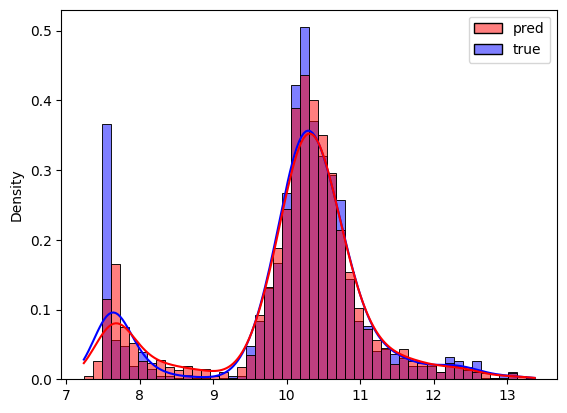

In [ ]:
sns.histplot(
    {'pred': np.ravel(dist1), 
     'true': np.ravel(dist2),
    }, 
    bins = 50, 
    palette = ['red', 'blue'],
    alpha = 0.5, 
    kde=True, 
    stat='density',
)

### 3.5 Using the model

We used the validation dataset to improve our model by adding new features to it. Now, we know which features we want to use, what we will do now is use both training and validation to get our final model.

In [ ]:
# Train
model = LinearRegression()
model.fit(X_train_val, y_train_val)

HTML(value='Query job 2da7c4c1-7d0b-4411-a3a5-75553317f5e6 is RUNNING. <a target="_blank" href="https://consol…

LinearRegression()

In [ ]:
# check how the model performed in validation set:
model.score(X_test, y_test)

HTML(value='Query job 690b0a7c-a107-4bbf-92cd-2dc3c727593c is DONE. 2.2 MB processed. <a target="_blank" href=…

HTML(value='Query job eae3c455-b8a5-48be-a112-7dbf82da9512 is RUNNING. <a target="_blank" href="https://consol…

HTML(value='Query job f336cac5-bb17-4144-8edc-2df8fea8896d is DONE. 0 Bytes processed. <a target="_blank" href…

HTML(value='Query job 3eb304ab-c0ce-4649-b708-7a51ecdaa568 is DONE. 56 Bytes processed. <a target="_blank" hre…

mean_absolute_error  mean_squared_error  mean_squared_log_error  \
0             0.119847            0.055168                0.000517   

   median_absolute_error  r2_score  explained_variance  
0               0.076573  0.952487             0.95249  

[1 rows x 6 columns]

HTML(value='Query job d077585c-ca5f-419f-8852-44b8e6c97c41 is RUNNING. <a target="_blank" href="https://consol…

HTML(value='Query job b9969e7c-8a0f-4542-bfad-4154e3cea1c9 is DONE. 19.1 kB processed. <a target="_blank" href…

HTML(value='Query job 86a20d03-4cc9-48c6-9379-bf8e6da948ed is DONE. 38.1 kB processed. <a target="_blank" href…

HTML(value='Query job b2ec841c-d540-481e-bb5c-5f6bddd01f3d is DONE. 0 Bytes processed. <a target="_blank" href…

<Axes: ylabel='Density'>

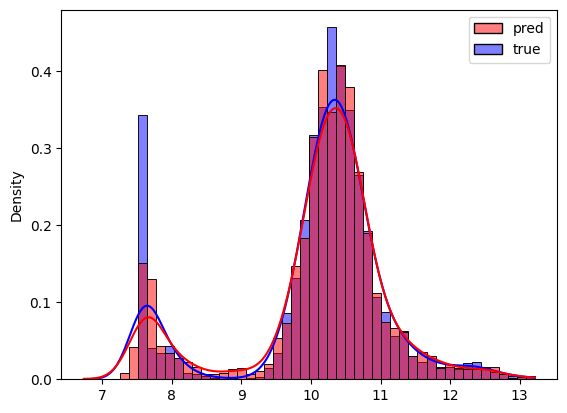

In [ ]:
y_pred = model.predict(X_test)
dist1 = to_pandas(y_pred)
dist2 = to_pandas(y_test)

sns.histplot(
    {'pred': np.ravel(dist1), 
     'true': np.ravel(dist2),
    }, 
    bins = 50, 
    palette = ['red', 'blue'],
    alpha = 0.5, 
    kde=True, 
    stat='density',
)

Amazing! Let's see it with one example.

In [ ]:
type(X_test)

bigframes.dataframe.DataFrame

In [ ]:
car = X_test.iloc[20].to_dict()

HTML(value='Query job 1791d640-ec70-4c32-815a-e5c35ee4d6ad is DONE. 0 Bytes processed. <a target="_blank" href…

In [ ]:
car

{'make': 'dodge',
 'model': 'durango',
 'engine_fuel_type': 'regular unleaded',
 'transmission_type': 'automatic',
 'driven_wheels': 'all wheel drive',
 'number_of_doors': 4,
 'market_category': 'crossover',
 'vehicle_size': 'large',
 'vehicle_style': '4dr suv',
 'engine_hp': 295.0,
 'engine_cylinders': 6.0,
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 1851,
 'age': 0}

In [ ]:
real_price = np.expm1(y_test.iloc[20].values[0])

HTML(value='Query job 90c670a2-3f0c-4d0e-a8fd-b79891e588ae is DONE. 0 Bytes processed. <a target="_blank" href…

In [ ]:
print(f'The real price of the car is: %0.0f USD'%real_price)

The real price of the car is: 45090 USD


In [ ]:
# Prepare new data:
new_data = bpd.read_pandas(
        pd.DataFrame(car, index=[0])
    )

HTML(value='Load job 032f3b04-5d35-4197-9c2f-dcc24331b897 is RUNNING. <a target="_blank" href="https://console…

In [ ]:
pred_price = np.expm1(model.predict(new_data).iloc[0].values[0])

HTML(value='Query job 95ff3f82-285a-4a7f-9cb1-8cb4d1ca559a is RUNNING. <a target="_blank" href="https://consol…

HTML(value='Query job 6c26bd92-3ad3-4b3f-8f3e-040dc8568b93 is DONE. 8 Bytes processed. <a target="_blank" href…

HTML(value='Query job 3fe0df15-78ee-4a84-8010-0d5c5c0417c8 is DONE. 16 Bytes processed. <a target="_blank" hre…

In [ ]:
print(f'The predicted price of the car is: %0.0f USD'%pred_price)

The predicted price of the car is: 39117 USD


In [ ]:
print(f'This means the client lost potential: %0.0f USD'%(real_price-pred_price))

This means the client lost potential: 5973 USD


We see this is ok, but there is potential room for improvement.

### 4. Upload model and predicitons to BQ

In [ ]:
df_bf[cat_features + num_features].head()

HTML(value='Query job c49cd5b1-2235-4991-858c-5be6a282a087 is DONE. 95.3 kB processed. <a target="_blank" href…

HTML(value='Query job 87b02018-1f22-490c-ac49-6b0f97ad6a96 is DONE. 2.1 MB processed. <a target="_blank" href=…

make       model             engine_fuel_type transmission_type  \
0  bmw  1 series m  premium unleaded (required)            manual   
1  bmw    1 series  premium unleaded (required)            manual   
2  bmw    1 series  premium unleaded (required)            manual   
3  bmw    1 series  premium unleaded (required)            manual   
4  bmw    1 series  premium unleaded (required)            manual   

      driven_wheels  number_of_doors                        market_category  \
0  rear wheel drive                2  factory tuner,luxury,high-performance   
1  rear wheel drive                2                     luxury,performance   
2  rear wheel drive                2                luxury,high-performance   
3  rear wheel drive                2                     luxury,performance   
4  rear wheel drive                2                                 luxury   

  vehicle_size vehicle_style  engine_hp  engine_cylinders  highway_mpg  \
0      compact         coupe      335.0               6.0           26   
1      compact   convertible      300.0               6.0           28   
2      compact         coupe      300.0               6.0           28   
3      compact         coupe      230.0               6.0           28   
4      compact   convertible      230.0               6.0           28   

   city_mpg  popularity  age  
0        19        3916    6  
1        19        3916    6  
2        20        3916    6  
3        18        3916    6  
4        18        3916    6  

[5 rows x 15 columns]

In [ ]:
df_bf[cat_features + num_features].dtypes

make                 string[pyarrow]
model                string[pyarrow]
engine_fuel_type     string[pyarrow]
transmission_type    string[pyarrow]
driven_wheels        string[pyarrow]
number_of_doors                Int64
market_category      string[pyarrow]
vehicle_size         string[pyarrow]
vehicle_style        string[pyarrow]
engine_hp                    Float64
engine_cylinders             Float64
highway_mpg                    Int64
city_mpg                       Int64
popularity                     Int64
age                            Int64
dtype: object

In [ ]:
y_df_bf = model.predict(df_bf[cat_features + num_features])

HTML(value='Query job e08e81cc-317a-46ba-849f-27e77263c848 is RUNNING. <a target="_blank" href="https://consol…

HTML(value='Query job 238ac189-5ab4-4f61-9b4c-e7cd69f0c444 is DONE. 95.3 kB processed. <a target="_blank" href…

In [ ]:
y_df_bf.head()

HTML(value='Query job c3dfde87-50ff-4923-82d9-b2034863d3f9 is DONE. 95.3 kB processed. <a target="_blank" href…

HTML(value='Query job 2f2d38ca-908f-4b82-958b-e6b9e16e1350 is DONE. 190.6 kB processed. <a target="_blank" hre…

predicted_log_msrp
0           10.753087
1           10.606723
2           10.598773
3           10.381565
4           10.384381

[5 rows x 1 columns]

In [ ]:
df_bf['log_msrp_pred'] = y_df_bf['predicted_log_msrp']

In [ ]:
df_pd = df_bf.to_pandas()

HTML(value='Query job cb05e11e-c73f-444e-8f31-42109c6c8f4c is RUNNING. <a target="_blank" href="https://consol…

In [ ]:
df_pd['msrp_pred'] = df_pd['log_msrp_pred'].apply(lambda x: np.expm1(x))

In [ ]:
df_bf = to_bigframes(df_pd)
df_bf.head()

HTML(value='Load job 48caaaa5-683a-408e-8502-8dead6044ff0 is RUNNING. <a target="_blank" href="https://console…

HTML(value='Query job d87d2dfb-62c7-4cb5-b812-b82eaea298f3 is DONE. 95.3 kB processed. <a target="_blank" href…

HTML(value='Query job 87c1c1d2-c966-40c8-ac35-c0da124650fa is DONE. 2.5 MB processed. <a target="_blank" href=…

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1 series m  2011  premium unleaded (required)      335.0   
1  bmw    1 series  2011  premium unleaded (required)      300.0   
2  bmw    1 series  2011  premium unleaded (required)      300.0   
3  bmw    1 series  2011  premium unleaded (required)      230.0   
4  bmw    1 series  2011  premium unleaded (required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear wheel drive                2   
1               6.0            manual  rear wheel drive                2   
2               6.0            manual  rear wheel drive                2   
3               6.0            manual  rear wheel drive                2   
4               6.0            manual  rear wheel drive                2   

                         market_category vehicle_size vehicle_style  \
0  factory tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp   log_msrp  age  log_msrp_pred  \
0           26        19        3916  46135  10.739349    6      10.753087   
1           28        19        3916  40650  10.612779    6      10.606723   
2           28        20        3916  36350  10.500977    6      10.598773   
3           28        18        3916  29450  10.290483    6      10.381565   
4           28        18        3916  34500  10.448744    6      10.384381   

      msrp_pred  
0  46773.202989  
1   40404.56673  
2  40084.614749  
3  32258.409952  
4  32349.394568  

[5 rows x 20 columns]

In [ ]:
model.to_gbq(f'{PROJECT_ID}.{DATASET}.CAR_PRICES_MODEL', replace=True)

HTML(value='Copy job 598f8722-bfa3-48af-bfdc-8332f63867df is RUNNING. <a target="_blank" href="https://console…

HTML(value='Query job 9bac5c0e-bc8a-403a-b4e6-9779389b8552 is RUNNING. <a target="_blank" href="https://consol…

In [ ]:
df_bf.to_gbq(f'{PROJECT_ID}.{DATASET}.CAR_PRICES_TEST_PREDICTIONS', if_exists="replace")

HTML(value='Query job acd8705b-41fa-498e-8ecf-169b33c0e2b4 is RUNNING. <a target="_blank" href="https://consol…

Now we're able to see our new column with the predictions:

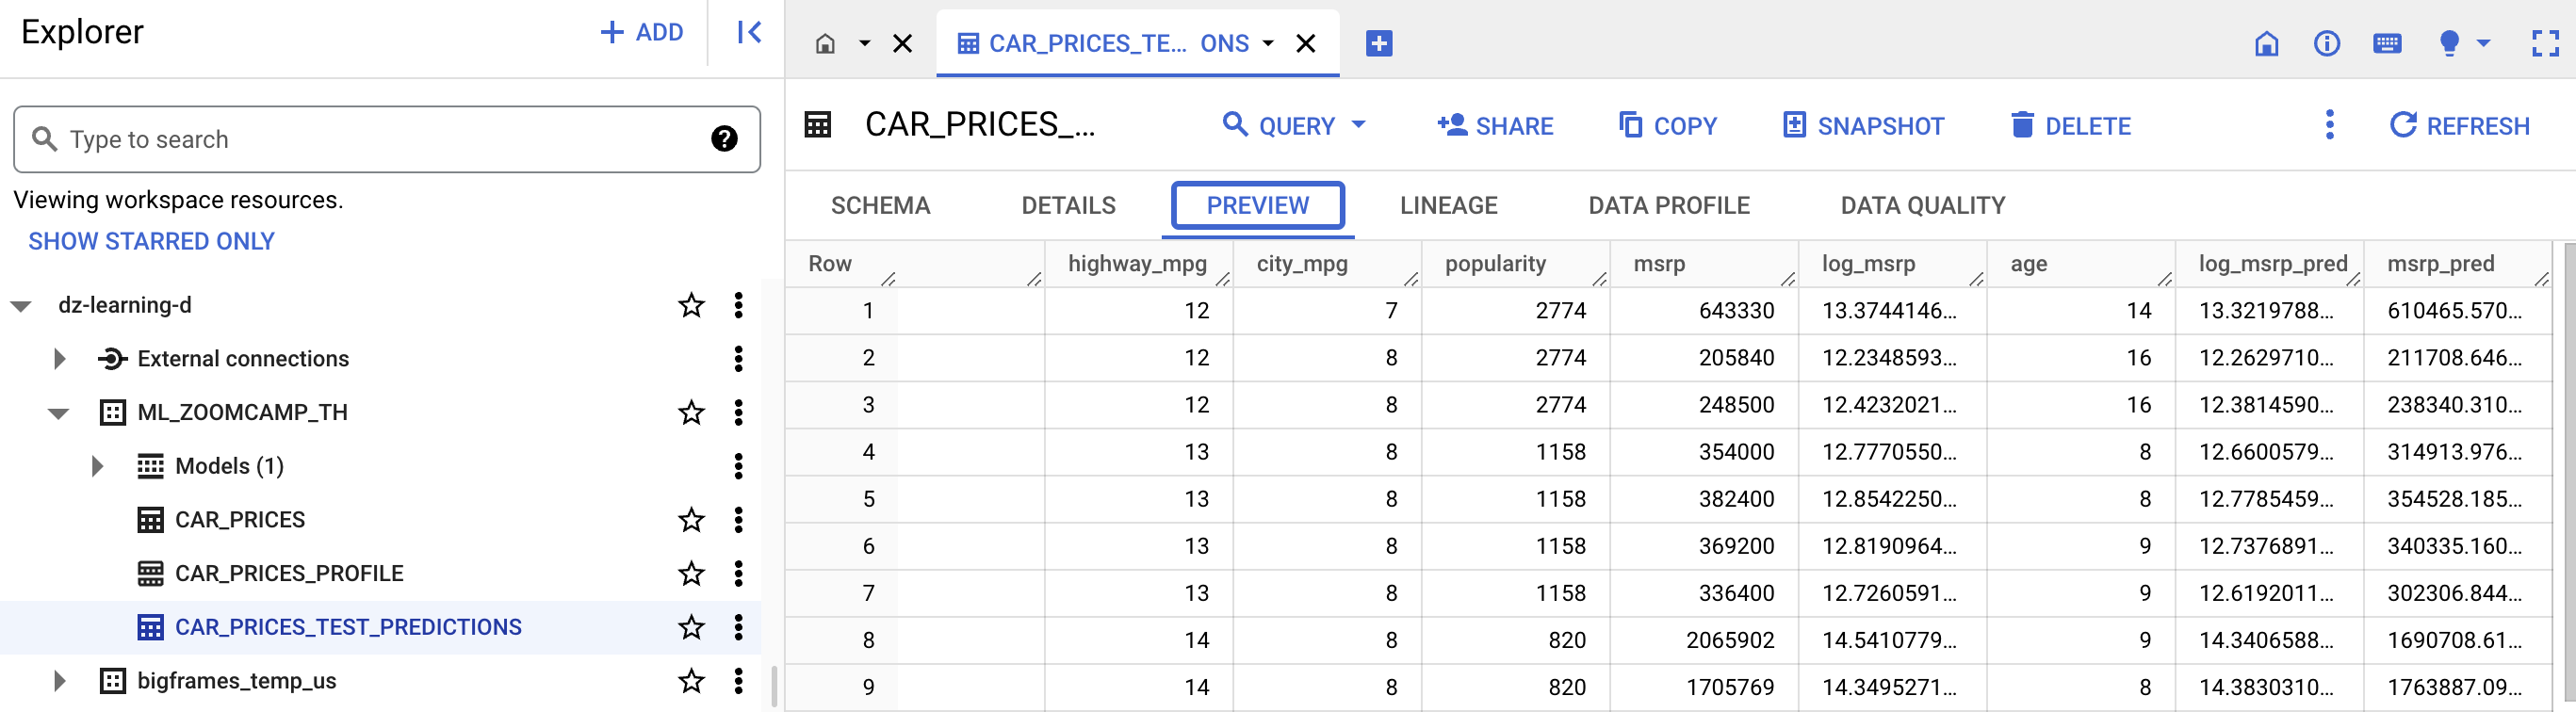